# What is `SBERT` SentenceTransformers

SentenceTransformers is a Python framework for state-of-the-art sentence, text and image embeddings.

Research Paper Link: https://arxiv.org/pdf/1908.10084.pdf

- It is superfast 5 seconds vs 50 hours with BERT
- SBERT can be tuned in less than 20 minutes, while yielding better results than comparable sentence embedding methods.
- It can be used for both classification and regression


BERT requires that both sentences are fed into the network, which causes a massive computational overhead:

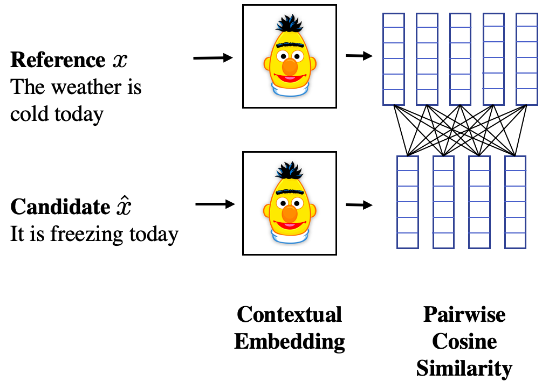

# Transformers | BERT

https://arxiv.org/pdf/1810.04805.pdf

BERT is an open source machine learning framework for natural language processing (NLP). BERT is designed to help computers understand the meaning of ambiguous language in text by using surrounding text to establish context. The BERT framework was pre-trained using text from Wikipedia and can be fine-tuned with question and answer datasets.

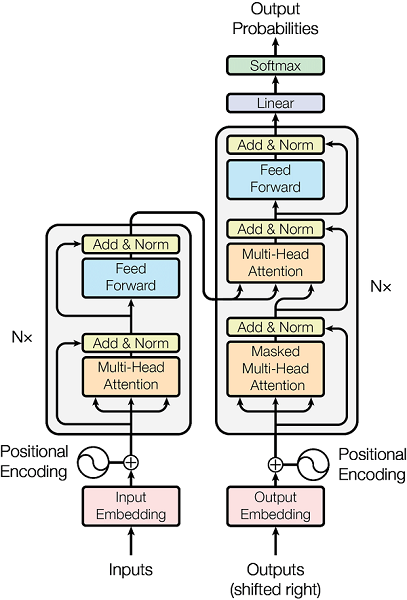

### What is BERT used for?
BERT is currently being used at Google to optimize the interpretation of user search queries. BERT excels at several functions that make this possible, including:

**Sequence-to-sequence based language generation tasks such as:**
- Question answering
- Abstract summarization
- Sentence prediction
- Conversational response generation

**Natural language understanding tasks such as:**
- Polysemy and Coreference (words that sound or look the same but have different meanings) resolution
- Word sense disambiguation
- Natural language inference
- Sentiment classification

# Siamese Network with a triplet loss
A Siamese Network is a type of network architecture that contains two or more identical subnetworks used to generate feature vectors for each input and compare them.


Siamese Networks can be applied to different use cases, like detecting duplicates, finding anomalies, and face recognition.


https://keras.io/examples/vision/siamese_network/

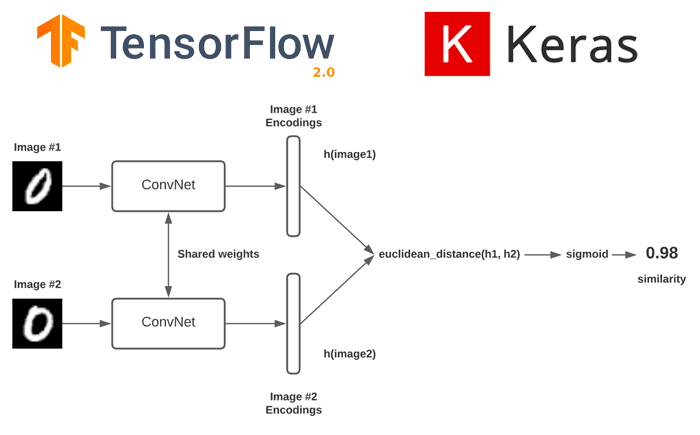

**Pros and Cons of Siamese Networks:**

The main advantages of Siamese Networks are,

- **More Robust to class Imbalance:** With the aid of One-shot learning, given a few images per class is sufficient for Siamese Networks to recognize those images in the future

- **Nice to an ensemble with the best classifier:** Given that its learning mechanism is somewhat different from Classification, simple averaging of it with a Classifier can do much better than average 2 correlated Supervised models (e.g. GBM & RF classifier)

- **Learning from Semantic Similarity:** Siamese focuses on learning embeddings (in the deeper layer) that place the same classes/concepts close together. Hence, can learn semantic similarity.

## SBERT Application
- Sentence Embeddings
- Semantic Textual Similarity
- Semantic Search
- Retrieve and Re-Rank
- Clustering
- Paraphrase Mining
- Trasnlated Sentence Mining
- Cross Encoders
- Similar Image Search [Make streamlit application]

# Sentence Embeddings and Similarity

Pretrained Models

https://www.sbert.net/docs/pretrained_models.html

In [ ]:
%pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79 kB 3.4 MB/s 
     |████████████████████████████████| 4.2 MB 30.7 MB/s 
     |████████████████████████████████| 1.2 MB 43.0 MB/s 
     |████████████████████████████████| 86 kB 4.5 MB/s 
     |████████████████████████████████| 6.6 MB 35.7 MB/s 
     |████████████████████████████████| 596 kB 47.1 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=762678f09aef31e0d715e4e0ff02a049f30e8f7b149b42c7edc243d52ed061bb
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from sentence_transformers import SentenceTransformer, util

In [ ]:
model = SentenceTransformer('all-MiniLM-L6-v2')


In [ ]:
sentences = ['the cat sits outside', 'the new moview is awesome', 'the new movie is really great', 'the dog bark on stangers']

In [ ]:
embeddings = model.encode(sentences=sentences, convert_to_tensor=True)

In [ ]:
for sent,embed in zip(sentences, embeddings):
  print("Sentence:", sent)
  print("Len(Embeddings:", len(embed))
  # print("Embeddings: ", embed)

Sentence: the cat sits outside
Len(Embeddings: 384
Sentence: the new moview is awesome
Len(Embeddings: 384
Sentence: the new movie is really great
Len(Embeddings: 384
Sentence: the dog bark on stangers
Len(Embeddings: 384


In [ ]:
cosine_scores = util.cos_sim(embeddings, embeddings)

In [ ]:
cosine_scores

tensor([[ 1.0000, -0.0295, -0.0258,  0.1578],
        [-0.0295,  1.0000,  0.8336,  0.0933],
        [-0.0258,  0.8336,  1.0000,  0.1001],
        [ 0.1578,  0.0933,  0.1001,  1.0000]])

In [ ]:
sentences

['the cat sits outside',
 'the new moview is awesome',
 'the new movie is really great',
 'the dog bark on stangers']

In [ ]:
paraphrases = util.paraphrase_mining(model, sentences)

In [ ]:
for sim in paraphrases[0:10]:
  score, i, j = sim
  print(sentences[i], "<>" ,sentences[j], " --> ",score)

the new moview is awesome <> the new movie is really great  -->  0.8336373567581177
the cat sits outside <> the dog bark on stangers  -->  0.15776793658733368
the new movie is really great <> the dog bark on stangers  -->  0.10014551877975464
the new moview is awesome <> the dog bark on stangers  -->  0.0932723879814148
the cat sits outside <> the new movie is really great  -->  -0.025751961395144463
the cat sits outside <> the new moview is awesome  -->  -0.02949126996099949


# Semantic Search

Semantic search seeks to improve search accuracy by understanding the content of the search query. In contrast to traditional search engines which only find documents based on lexical matches, semantic search can also find synonyms.



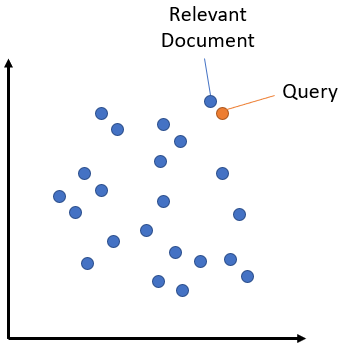

At search time, the query is embedded into the same vector space and the closest embeddings from your corpus are found. These entries should have a high semantic overlap with the query.

### Type of Semantic Search

- symmetric semantic search https://www.sbert.net/docs/pretrained_models.html#sentence-embedding-models
- asymmetric semantic search https://www.sbert.net/docs/pretrained-models/msmarco-v3.html

In [ ]:
%pip install -U sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer, util
import torch

In [ ]:
model = SentenceTransformer('multi-qa-MiniLM-L6-cos-v1')

In [ ]:
# https://github.com/laxmimerit

In [ ]:
import requests

In [ ]:
response = requests.get('https://raw.githubusercontent.com/laxmimerit/machine-learning-dataset/master/text-dataset-for-machine-learning/sbert-corpus.txt')
corpus = response.text.split('\r\n')

response = requests.get('https://raw.githubusercontent.com/laxmimerit/machine-learning-dataset/master/text-dataset-for-machine-learning/sbert-queries.txt')
queries = response.text.split('\r\n')

In [ ]:
print(corpus)

['A man is eating food.', 'A man is eating a piece of bread.', 'A man is eating pasta.', 'The girl is carrying a baby.', 'The baby is carried by the woman', 'A man is riding a horse.', 'A man is riding a white horse on an enclosed ground.', 'A monkey is playing drums.', 'Someone in a gorilla costume is playing a set of drums.', 'A cheetah is running behind its prey.', 'A cheetah chases prey on across a field.']


In [ ]:
print(queries)

['A man is eating pasta.', 'Someone in a gorilla costume is playing a set of drums.', 'A cheetah chases prey on across a field.']


In [ ]:
corpus_embeddings = model.encode(corpus, convert_to_tensor=True)
queries_embeddings = model.encode(queries, convert_to_tensor=True)

In [ ]:
# corpus_embeddings[0]

In [ ]:
# lets normalize vectors for fast calculation
corpus_embeddings = util.normalize_embeddings(corpus_embeddings)
queries_embeddings = util.normalize_embeddings(queries_embeddings)

In [ ]:
len(corpus_embeddings[0])

384

In [ ]:
hits = util.semantic_search(queries_embeddings, corpus_embeddings, score_function=util.dot_score, top_k=3)

In [ ]:
hits

[[{'corpus_id': 2, 'score': 0.9999997615814209},
  {'corpus_id': 0, 'score': 0.8384664058685303},
  {'corpus_id': 1, 'score': 0.7468275427818298}],
 [{'corpus_id': 8, 'score': 1.0},
  {'corpus_id': 7, 'score': 0.7612731456756592},
  {'corpus_id': 3, 'score': 0.38152894377708435}],
 [{'corpus_id': 10, 'score': 0.9999997019767761},
  {'corpus_id': 9, 'score': 0.8703992962837219},
  {'corpus_id': 6, 'score': 0.3741169273853302}]]

In [ ]:
for query, hit in zip(queries, hits):
  for q_hit in hit:
    id = q_hit['corpus_id']
    score = q_hit['score']

    print(query, "<>", corpus[id], "-->", score)

  print()
  

A man is eating pasta. <> A man is eating pasta. --> 0.9999997615814209
A man is eating pasta. <> A man is eating food. --> 0.8384664058685303
A man is eating pasta. <> A man is eating a piece of bread. --> 0.7468275427818298

Someone in a gorilla costume is playing a set of drums. <> Someone in a gorilla costume is playing a set of drums. --> 1.0
Someone in a gorilla costume is playing a set of drums. <> A monkey is playing drums. --> 0.7612731456756592
Someone in a gorilla costume is playing a set of drums. <> The girl is carrying a baby. --> 0.38152894377708435

A cheetah chases prey on across a field. <> A cheetah chases prey on across a field. --> 0.9999997019767761
A cheetah chases prey on across a field. <> A cheetah is running behind its prey. --> 0.8703992962837219
A cheetah chases prey on across a field. <> A man is riding a white horse on an enclosed ground. --> 0.3741169273853302



# Clustering

Sentence-Transformers can be used in different ways to perform clustering of small or large set of sentences.

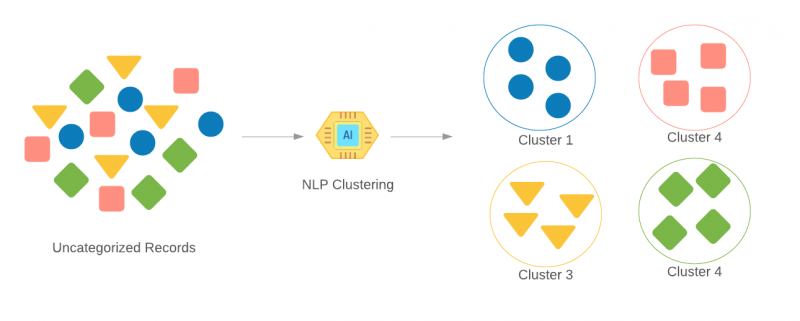

In fact, clusters are nothing more than groups that contain similar objects. Clustering is the process used for separating the objects into these groups.

### K-Mean Clustering

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

In [ ]:
model = SentenceTransformer('all-MiniLM-L6-v2')

In [ ]:
import requests
response = requests.get('https://raw.githubusercontent.com/laxmimerit/machine-learning-dataset/master/text-dataset-for-machine-learning/sbert-corpus.txt')
corpus = response.text.split('\r\n')

In [ ]:
len(corpus), print(corpus)

['A man is eating food.', 'A man is eating a piece of bread.', 'A man is eating pasta.', 'The girl is carrying a baby.', 'The baby is carried by the woman', 'A man is riding a horse.', 'A man is riding a white horse on an enclosed ground.', 'A monkey is playing drums.', 'Someone in a gorilla costume is playing a set of drums.', 'A cheetah is running behind its prey.', 'A cheetah chases prey on across a field.']


(11, None)

In [ ]:
corpus_embeddings = model.encode(corpus)

In [ ]:
num_clusters = 5
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

In [ ]:
cluster_assignment

array([1, 1, 1, 3, 3, 2, 2, 4, 4, 0, 0], dtype=int32)

In [ ]:
clustered_sentences = [[] for i in range(num_clusters)]
clustered_sentences

[[], [], [], [], []]

In [ ]:
for sentence_id, cluster_id in enumerate(cluster_assignment):
  clustered_sentences[cluster_id].append(corpus[sentence_id])

In [ ]:
for i, cluster in enumerate(clustered_sentences):
  print("Cluster ", i+1)
  print(cluster)
  print()

Cluster  1
['A cheetah is running behind its prey.', 'A cheetah chases prey on across a field.']

Cluster  2
['A man is eating food.', 'A man is eating a piece of bread.', 'A man is eating pasta.']

Cluster  3
['A man is riding a horse.', 'A man is riding a white horse on an enclosed ground.']

Cluster  4
['The girl is carrying a baby.', 'The baby is carried by the woman']

Cluster  5
['A monkey is playing drums.', 'Someone in a gorilla costume is playing a set of drums.']



### Agglomerative Clustering

It is a type of hierarchical clustering. The hierarchical clustering analysis is a method of cluster analysis that seeks to build a hierarchy of clusters i.e. tree-type structure based on the hierarchy.

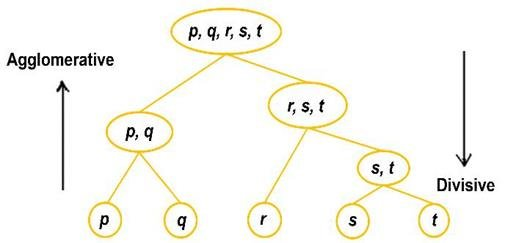

It is known as bottom-up approach or hierarchical agglomerative clustering (HAC)

In contrast to k-means, we can specify a threshold for the clustering.

It is useful if the number of clusters is unknown

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import AgglomerativeClustering
import numpy as np


In [ ]:
model = SentenceTransformer('all-MiniLM-L6-v2')

In [ ]:
import requests
response = requests.get('https://raw.githubusercontent.com/laxmimerit/machine-learning-dataset/master/text-dataset-for-machine-learning/sbert-corpus.txt')
corpus = response.text.split('\r\n')

In [ ]:
print(corpus)

['A man is eating food.', 'A man is eating a piece of bread.', 'A man is eating pasta.', 'The girl is carrying a baby.', 'The baby is carried by the woman', 'A man is riding a horse.', 'A man is riding a white horse on an enclosed ground.', 'A monkey is playing drums.', 'Someone in a gorilla costume is playing a set of drums.', 'A cheetah is running behind its prey.', 'A cheetah chases prey on across a field.']


In [ ]:
corous_embeddings = model.encode(corpus)

In [ ]:
corpus_embeddings = corpus_embeddings/np.linalg.norm(corpus_embeddings, axis=1, keepdims=True)

In [ ]:
clustering_model = AgglomerativeClustering(n_clusters=None, distance_threshold=1.5)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

In [ ]:
cluster_assignment

array([0, 0, 0, 4, 4, 1, 1, 2, 2, 3, 3])

In [ ]:
np.unique(cluster_assignment)

array([0, 1, 2, 3, 4])

In [ ]:
num_clusters = len(np.unique(cluster_assignment))
clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
  clustered_sentences[cluster_id].append(corpus[sentence_id])


for i, cluster in enumerate(clustered_sentences):
  print("Cluster ", i+1)
  print(cluster)
  print()


Cluster  1
['A man is eating food.', 'A man is eating a piece of bread.', 'A man is eating pasta.']

Cluster  2
['A man is riding a horse.', 'A man is riding a white horse on an enclosed ground.']

Cluster  3
['A monkey is playing drums.', 'Someone in a gorilla costume is playing a set of drums.']

Cluster  4
['A cheetah is running behind its prey.', 'A cheetah chases prey on across a field.']

Cluster  5
['The girl is carrying a baby.', 'The baby is carried by the woman']



# Fast Clustering

`Agglomerative Clustering` for larger datasets is quite slow, so it is only applicable for maybe a few thousand sentences.

Fast Clustering can fine-tune 50k sentences withing few seconds. You can use threshold to define clustering criteria.

We will use Quora Duplicate Questions dataset: https://quoradata.quora.com/First-Quora-Dataset-Release-Question-Pairs


In [ ]:
from sentence_transformers import SentenceTransformer, util

In [ ]:
import pandas as pd
import time

In [ ]:
model = SentenceTransformer('all-MiniLM-L6-v2')

In [ ]:
df = pd.read_csv('http://qim.fs.quoracdn.net/quora_duplicate_questions.tsv', sep='\t')
df.shape

(404290, 6)

In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [ ]:
sentences = df['question1'].tolist()[:1000]
len(sentences)

1000

In [ ]:
corpus_embeddings = model.encode(sentences, batch_size=64, show_progress_bar=True)

Batches:   0%|          | 0/16 [00:00<?, ?it/s]

In [ ]:
clusters = util.community_detection(corpus_embeddings, min_community_size=5, threshold=0.5)

In [ ]:
for i,cluster in enumerate(clusters):
  print("\nCluster {}, #{} Questions".format(i+1, len(cluster)))
  for id in cluster[0:3]:
    print("\t", sentences[id])
  print("\t", "...")


Cluster 1, #10 Questions
	 Which are the best Hollywood thriller movies?
	 What are the most underrated and overrated movies you've seen?
	 What are the best films that take place in one room?
	 ...

Cluster 2, #9 Questions
	 What are your views on Modi governments decision to demonetize 500 and 1000 rupee notes? How will this affect economy?
	 What's your opinion about the decision on removal of 500 and 1000 rupees currency notes?
	 How will Indian GDP be affected from banning 500 and 1000 rupees notes?
	 ...

Cluster 3, #8 Questions
	 What is best way to make money online?
	 How can I make money through the Internet?
	 What are the easy ways to earn money online?
	 ...

Cluster 4, #7 Questions
	 What are the most important things for living a good life?
	 What is most important in life - money or values?
	 What is the best lesson in life?
	 ...

Cluster 5, #6 Questions
	 What is our stance against Pakistan?
	 What is the reason Pakistan supports terrorism?
	 If there will be a war b